# Real Estate Price Prediction - using Advanced Linear Regression Techniques

Overview:
There are several factors that influence the price a buyer is willing to pay for a house. Some are apparent and obvious and some are not.
A large data set with 79 different features (like living area, number of rooms, location etc) along with their prices are provided for residential homes in Ames, Iowa. The challenge is to learn a relationship between the important features and the price and use it to predict the prices of a new set of houses.

In [209]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [73]:
#Load data
df=pd.read_csv('D:\\class notes\\ML\\train.csv')

In [74]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [75]:
#Data preparation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [76]:
#Statistical Summary

In [77]:
# dataframe with categorical features
df.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [78]:
# dataframe with numerical features
df.describe(include=['int64'])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [79]:
df.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [80]:
# 3.2 Spliting Target Variable
#Here the Target Variable is separated from data and the distribution is checked.
target = df['SalePrice']
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

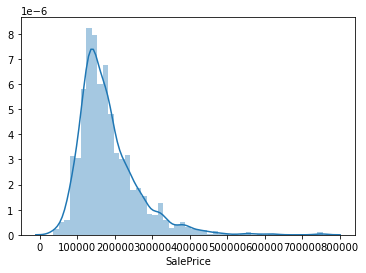

In [81]:
# Visualizing the distribution of Salesprice(Dependent) variable 
import seaborn as sns
sns.distplot(target,hist=True)

#As we can see the distribution is right skewed, so in order to make it normally distributed, we need to use log transformation.

In [82]:
# Log transformation
import numpy as np
target_log  = np.log(target)
data=df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022761451070>,
      dtype=object)

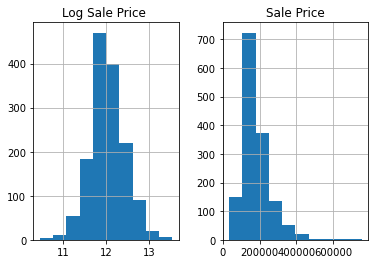

In [83]:
import matplotlib
prices = pd.DataFrame({"Sale Price":data["SalePrice"],"Log Sale Price ":target_log})
prices.hist()

In [84]:
# drop target variable from dataset
raw_data = data
data = data.drop(["SalePrice"], axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


3.3 Feature Engineering


In [85]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [86]:
# Adding total sqfootage feature 
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id
data = data.drop(["TotalBsmtSF"], axis=1)
data = data.drop(["1stFlrSF"], axis=1)
data = data.drop(["2ndFlrSF"], axis=1)
data = data.drop(["Id"], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2566
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2524
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2706
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2473
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,3343


3.4 Split Dataframe into numeric and categorical

Split dataframe into 2 with:

    categorical features
    numerical features


In [87]:
# save all categorical columns in list
categorical_columns = [col for col in data.columns.values if data[col].dtype == 'object']

# dataframe with categorical features
data_cat = data[categorical_columns]
# dataframe with numerical features
data_num = data.drop(categorical_columns, axis=1)

In [88]:
# Using describe function in numeric dataframe 
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2567.048630
std,24.284752,9981.264932,1.382997,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,821.714421
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000
25%,59.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.500000
50%,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2474.000000
75%,80.000000,11601.500000,7.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3004.000000
max,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,11752.000000


In [89]:
# Printing 5 head observation in categorical dataframe
data_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


In [90]:
#3.5 Reduce Skewness for Numeric Features

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Here we are interested in the variables which have skewness more than 0.75

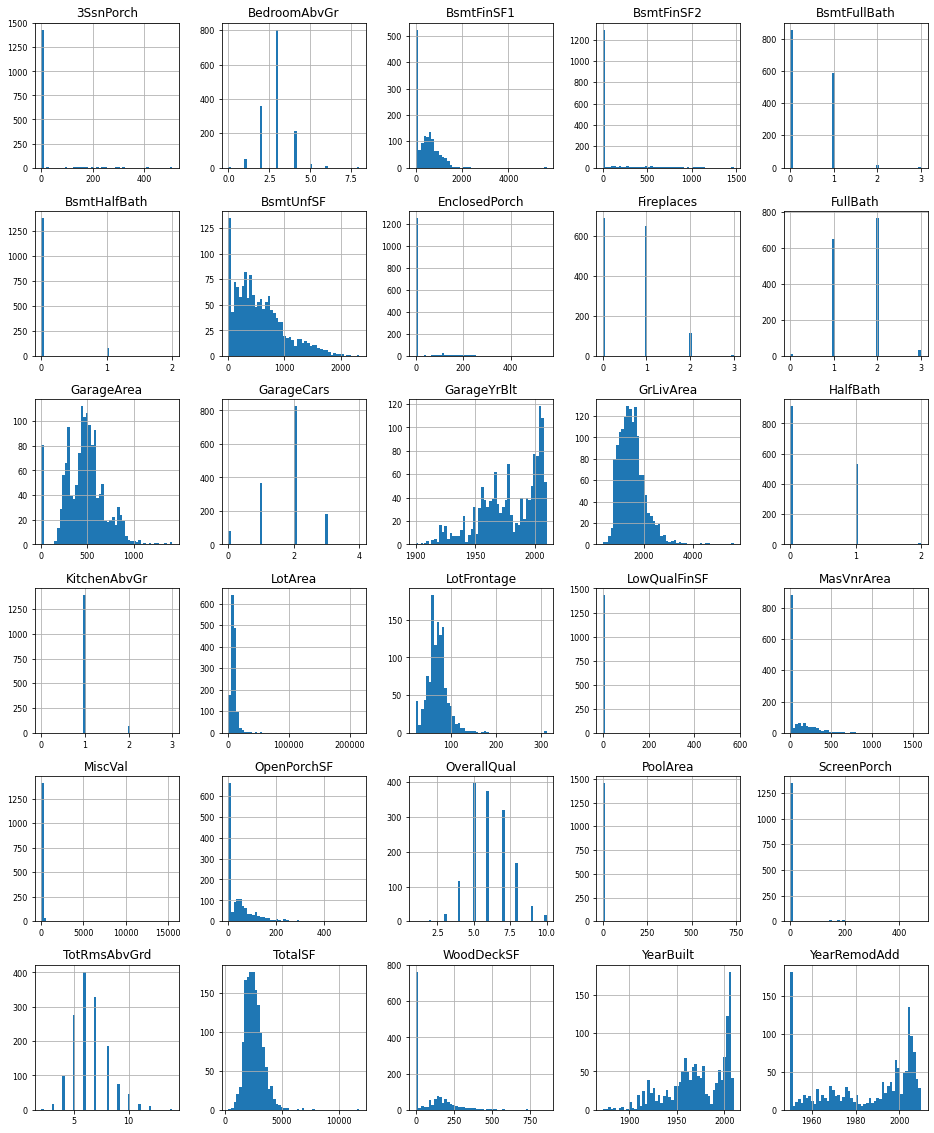

In [91]:
data_num.hist(figsize=(16, 20), 
              bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [92]:
from scipy.stats import skew
data_num_skew=data_num.apply(lambda x:skew(x.dropna()))

In [93]:
data_num_skew

LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
TotalSF           1.774874
dtype: float64

In [94]:
# apply log + 1 transformation for all numeric features with skewnes over .75
data_num[data_num_skew.index]=np.log1p(data_num[data_num_skew.index])

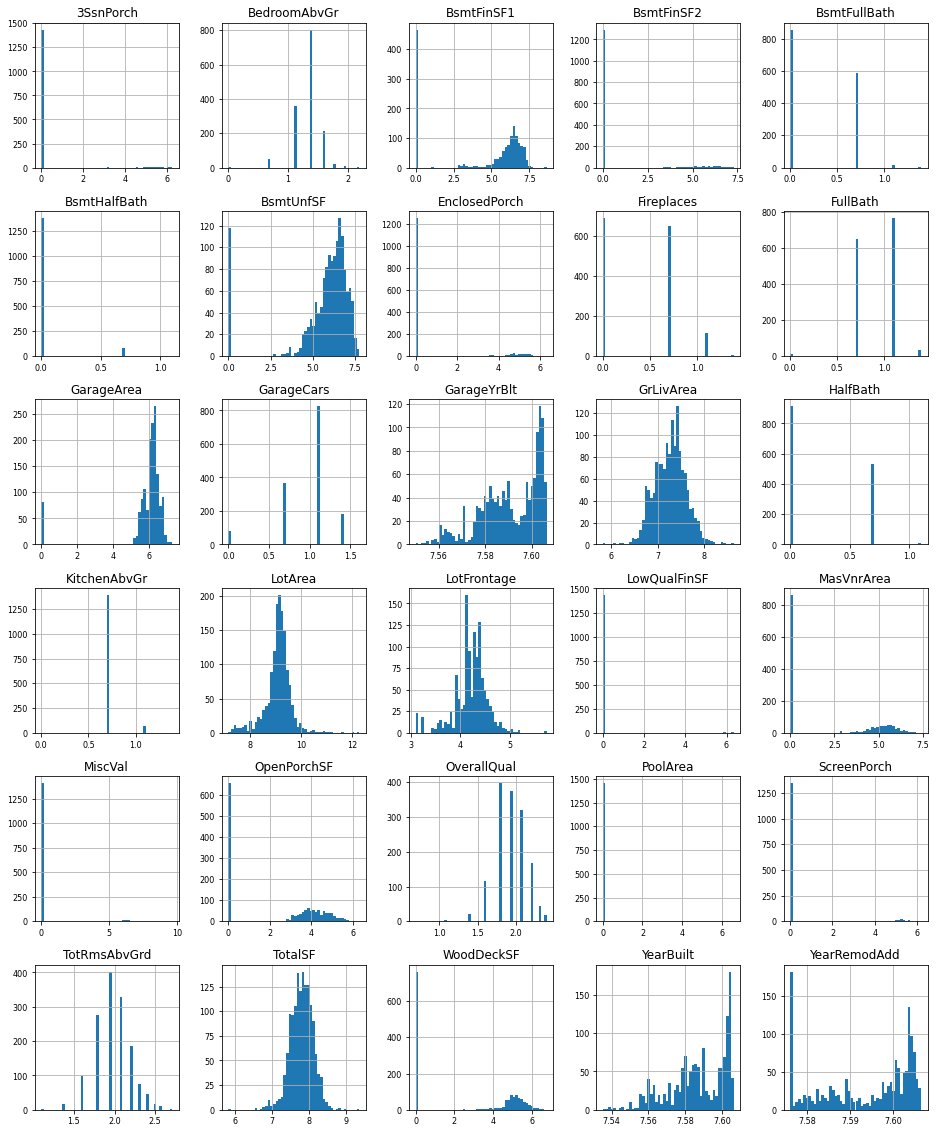

In [95]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

3.6 Mean Normalization

In [96]:

data_num = ((data_num - data_num.mean())/(data_num.max() - data_num.min()))
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1.201000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.452000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.494947e-15,4.984835e-16,-7.748178e-15,-1.978309e-14,7.734376e-15,-2.879545e-16,4.277020e-16,1.277517e-17,5.977049e-16,-2.756072e-17,...,-4.664648e-15,1.191743e-15,4.643166e-16,-4.462564e-16,6.616663e-17,-1.454791e-17,1.127333e-17,-7.648467e-17,2.399622e-17,-1.981462e-15
std,1.302418e-01,1.012732e-01,1.184824e-01,2.164741e-01,3.441417e-01,3.566180e-01,3.463615e-01,2.528701e-01,2.390241e-01,1.176771e-01,...,2.002369e-01,2.004928e-01,3.843948e-01,3.413088e-01,2.735105e-01,1.070007e-01,2.272059e-01,6.641407e-02,1.270673e-01,8.809425e-02
min,-4.198342e-01,-3.797634e-01,-7.315811e-01,-7.247740e-01,-5.829871e-01,-2.889448e-01,-4.896358e-01,-8.982469e-02,-7.282006e-01,-1.571654e-02,...,-6.043096e-01,-8.002742e-01,-3.637825e-01,-3.660704e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,-5.589950e-01
25%,-4.241893e-02,-3.544346e-02,-8.713847e-02,-1.220401e-01,-2.965651e-01,-2.889448e-01,-4.896358e-01,-8.982469e-02,-3.051994e-02,-1.571654e-02,...,-1.736331e-01,1.024559e-03,-3.637825e-01,-3.660704e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,-5.530119e-02
50%,1.556841e-02,8.988780e-03,3.285843e-03,1.400793e-02,1.532939e-01,-2.889448e-01,1.993641e-01,-8.982469e-02,6.733259e-02,-1.571654e-02,...,7.829656e-02,5.066495e-02,-3.637825e-01,1.505731e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,3.122795e-03
75%,7.047235e-02,4.854699e-02,8.161495e-02,2.051035e-01,3.183650e-01,4.047022e-01,2.708912e-01,-8.982469e-02,1.350357e-01,-1.571654e-02,...,7.829656e-02,7.573830e-02,3.956845e-01,3.053412e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,5.766237e-02
max,5.801658e-01,6.202366e-01,2.684189e-01,2.752260e-01,4.170129e-01,7.110552e-01,5.103642e-01,9.101753e-01,2.717994e-01,9.842835e-01,...,3.956904e-01,1.997258e-01,6.362175e-01,6.339296e-01,8.894728e-01,9.862528e-01,9.335038e-01,9.953929e-01,9.758043e-01,4.410050e-01


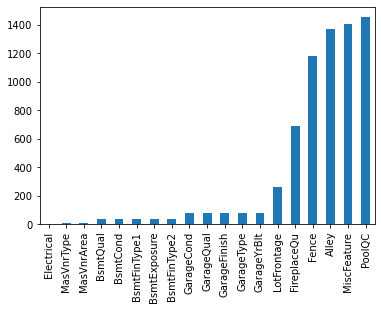

In [97]:
# first we'll visualize null count in overall dataframe
null_in_HousePrice = data.isnull().sum()
null_in_HousePrice = null_in_HousePrice[null_in_HousePrice > 0]
null_in_HousePrice.sort_values(inplace=True)
null_in_HousePrice.plot.bar()

In [98]:
# Printing total numbers and percentage of missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [99]:
target_f=pd.DataFrame(target)

In [100]:
target_f

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [101]:
target_2f=target_f

In [102]:
#checking for outliers
q1=target_2f['SalePrice'].quantile(0.25)
q3=target_2f['SalePrice'].quantile(0.75)
IQR=q3-q1


In [103]:
outliers=[]
for i in target_2f['SalePrice']:
    if i<q1 or i>q3:
        outliers.append(i)
print('outliers:',outliers)
print('Len of the outliers:',len(outliers))

outliers: [223500, 250000, 307000, 129900, 118000, 129500, 345000, 279500, 90000, 325300, 230000, 129900, 256300, 306000, 68500, 40000, 277500, 309000, 109000, 82000, 319900, 239686, 249700, 113000, 127000, 114500, 110000, 385000, 438780, 124900, 101000, 219500, 317000, 226000, 80000, 225000, 244000, 129500, 107400, 91000, 127000, 110000, 245000, 126500, 260000, 85000, 123600, 109900, 98600, 94750, 83000, 128950, 118964, 250000, 100000, 115000, 115000, 383970, 217000, 259500, 320000, 100000, 84500, 128000, 87000, 226000, 244000, 220000, 230000, 231500, 115000, 260000, 125000, 105000, 222500, 115000, 122000, 372402, 235000, 125000, 79000, 109500, 269500, 254900, 320000, 412500, 220000, 103200, 127500, 325624, 228000, 128500, 215000, 239000, 243000, 501837, 100000, 120000, 127000, 475000, 286000, 315000, 127000, 311872, 235000, 104000, 274900, 112000, 110000, 277000, 98000, 252678, 107000, 311500, 97000, 386250, 112000, 290000, 106000, 125000, 403000, 94500, 128200, 216500, 89500, 318000

In [104]:
#since Len of the outliers: 727 it is better not to remove the outliers

#Missing Data Treatment

In [105]:
pd.set_option('display.max_rows',500)

In [106]:
data.isnull().sum()/data.shape[0]

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
Heating          0.000000
HeatingQC   

In [118]:
data_cat.isnull().sum()/data_cat.shape[0]
#Alley
#PoolQC           
#Fence            
#MiscFeature      


MSSubClass       0.000000
MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallCond      0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond  

In [120]:
data_cat=data_cat.drop(['Alley','PoolQC','FireplaceQu','Fence', 'MiscFeature'],axis=1)

In [130]:
data_cat.isnull().sum()/data_cat.shape[0]

MSSubClass       0.000000
MSZoning         0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallCond      0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
MoSold      

Dummy Coding

In [131]:
data_cat=pd.get_dummies(data_cat,drop_first=True)

In [132]:
data_cat

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [127]:
data_num.isnull().sum()/data_num.shape[0]
#No need to drop columns

LotFrontage      0.177397
LotArea          0.000000
OverallQual      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.005479
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageYrBlt      0.055479
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
TotalSF          0.000000
dtype: float64

In [133]:
Final_data=pd.concat([data_num,data_cat],axis=1)

In [136]:
Final_data.isnull().sum()/Final_data.shape[0]

LotFrontage              0.177397
LotArea                  0.000000
OverallQual              0.000000
YearBuilt                0.000000
YearRemodAdd             0.000000
MasVnrArea               0.005479
BsmtFinSF1               0.000000
BsmtFinSF2               0.000000
BsmtUnfSF                0.000000
LowQualFinSF             0.000000
GrLivArea                0.000000
BsmtFullBath             0.000000
BsmtHalfBath             0.000000
FullBath                 0.000000
HalfBath                 0.000000
BedroomAbvGr             0.000000
KitchenAbvGr             0.000000
TotRmsAbvGrd             0.000000
Fireplaces               0.000000
GarageYrBlt              0.055479
GarageCars               0.000000
GarageArea               0.000000
WoodDeckSF               0.000000
OpenPorchSF              0.000000
EnclosedPorch            0.000000
3SsnPorch                0.000000
ScreenPorch              0.000000
PoolArea                 0.000000
MiscVal                  0.000000
TotalSF       

In [137]:
Imputer=KNNImputer()

In [138]:
Final=Imputer.fit_transform(Final_data)

In [140]:
Independent_variables=pd.DataFrame(Final,columns=Final_data.columns)

In [144]:
Independent_variables.isnull().sum().sum()
#No missing values

0

Exploratory Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


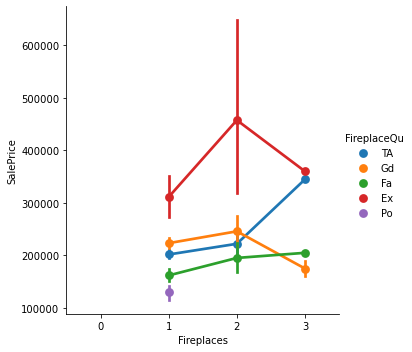

In [146]:
sns.factorplot("Fireplaces","SalePrice",data=raw_data,hue="FireplaceQu");

If there are two fireplaces, the Sales Price increases.
Also, if there are fireplace of Excellent quality in the house the Sales Price increases.

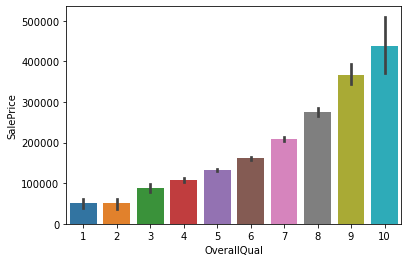

In [149]:
sns.barplot(raw_data.OverallQual,raw_data.SalePrice)
#As we can see, the Sales Price increases with the increase in Overall Quality.

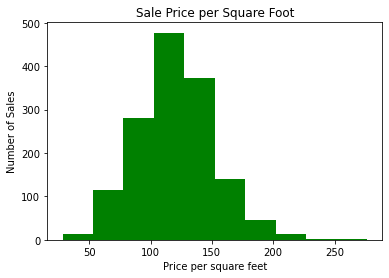

In [151]:
# SalePrice per Square Foot
SalePriceSF = raw_data['SalePrice']/raw_data['GrLivArea']
plt.hist(SalePriceSF, color="green")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');
#Most of the sales happend in 100 to 150 square feet

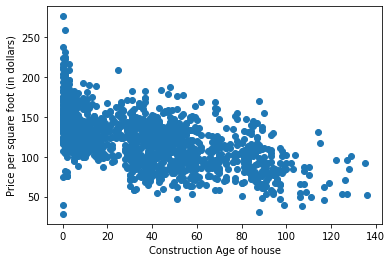

In [153]:
ConstructionAge = raw_data['YrSold'] - raw_data['YearBuilt']
plt.scatter(ConstructionAge, SalePriceSF)
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house");
#From the above representation, price of house goes down with its age.

Correlation

In [154]:
data_num.corr()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
LotFrontage,1.000000,0.744489,0.209063,0.089323,0.065482,0.127287,0.067368,0.037418,0.118688,-0.004643,...,0.262532,0.190684,0.063341,0.147026,-0.020764,0.063754,0.049505,0.130543,0.030660,0.404449
LotArea,0.744489,1.000000,0.166058,0.022222,0.027749,0.070814,0.096966,0.084312,0.047510,-0.010681,...,0.257434,0.206555,0.122915,0.137754,-0.015186,0.055375,0.087518,0.097257,0.080298,0.427126
OverallQual,0.209063,0.166058,1.000000,0.560651,0.543028,0.402930,0.061576,-0.084772,0.273125,-0.031511,...,0.555613,0.394182,0.274390,0.432827,-0.151654,0.033223,0.055617,0.064207,-0.080329,0.673569
YearBuilt,0.089323,0.022222,0.560651,1.000000,0.589814,0.413692,0.153594,-0.066773,0.088512,-0.183260,...,0.514133,0.341192,0.306712,0.386757,-0.447926,0.029102,-0.058998,0.005906,-0.077181,0.364333
YearRemodAdd,0.065482,0.027749,0.543028,0.589814,1.000000,0.225315,0.013034,-0.101696,0.166512,-0.057520,...,0.383924,0.207240,0.286163,0.382483,-0.227351,0.052374,-0.039815,0.009199,-0.074313,0.362312
MasVnrArea,0.127287,0.070814,0.402930,0.413692,0.225315,1.000000,0.187634,-0.063060,0.093735,-0.108590,...,0.357808,0.240750,0.162007,0.210584,-0.186633,0.047055,0.037433,0.005363,-0.054461,0.383048
BsmtFinSF1,0.067368,0.096966,0.061576,0.153594,0.013034,0.187634,1.000000,0.185051,-0.265488,-0.063563,...,0.088756,0.123409,0.082144,0.015075,-0.127733,0.051775,0.073392,0.042147,0.018808,0.167094
BsmtFinSF2,0.037418,0.084312,-0.084772,-0.066773,-0.101696,-0.063060,0.185051,1.000000,-0.272666,0.006314,...,-0.029136,0.035878,0.059134,-0.077644,0.038587,-0.022537,0.063879,0.068055,0.027978,0.019398
BsmtUnfSF,0.118688,0.047510,0.273125,0.088512,0.166512,0.093735,-0.265488,-0.272666,1.000000,0.001886,...,0.133560,0.091182,0.014448,0.182827,0.001014,0.004390,0.012820,-0.026761,-0.030640,0.377397
LowQualFinSF,-0.004643,-0.010681,-0.031511,-0.183260,-0.057520,-0.108590,-0.063563,0.006314,0.001886,1.000000,...,-0.111716,-0.130659,-0.037934,-0.000397,0.047332,0.016699,-0.014132,0.068662,0.025156,-0.022774


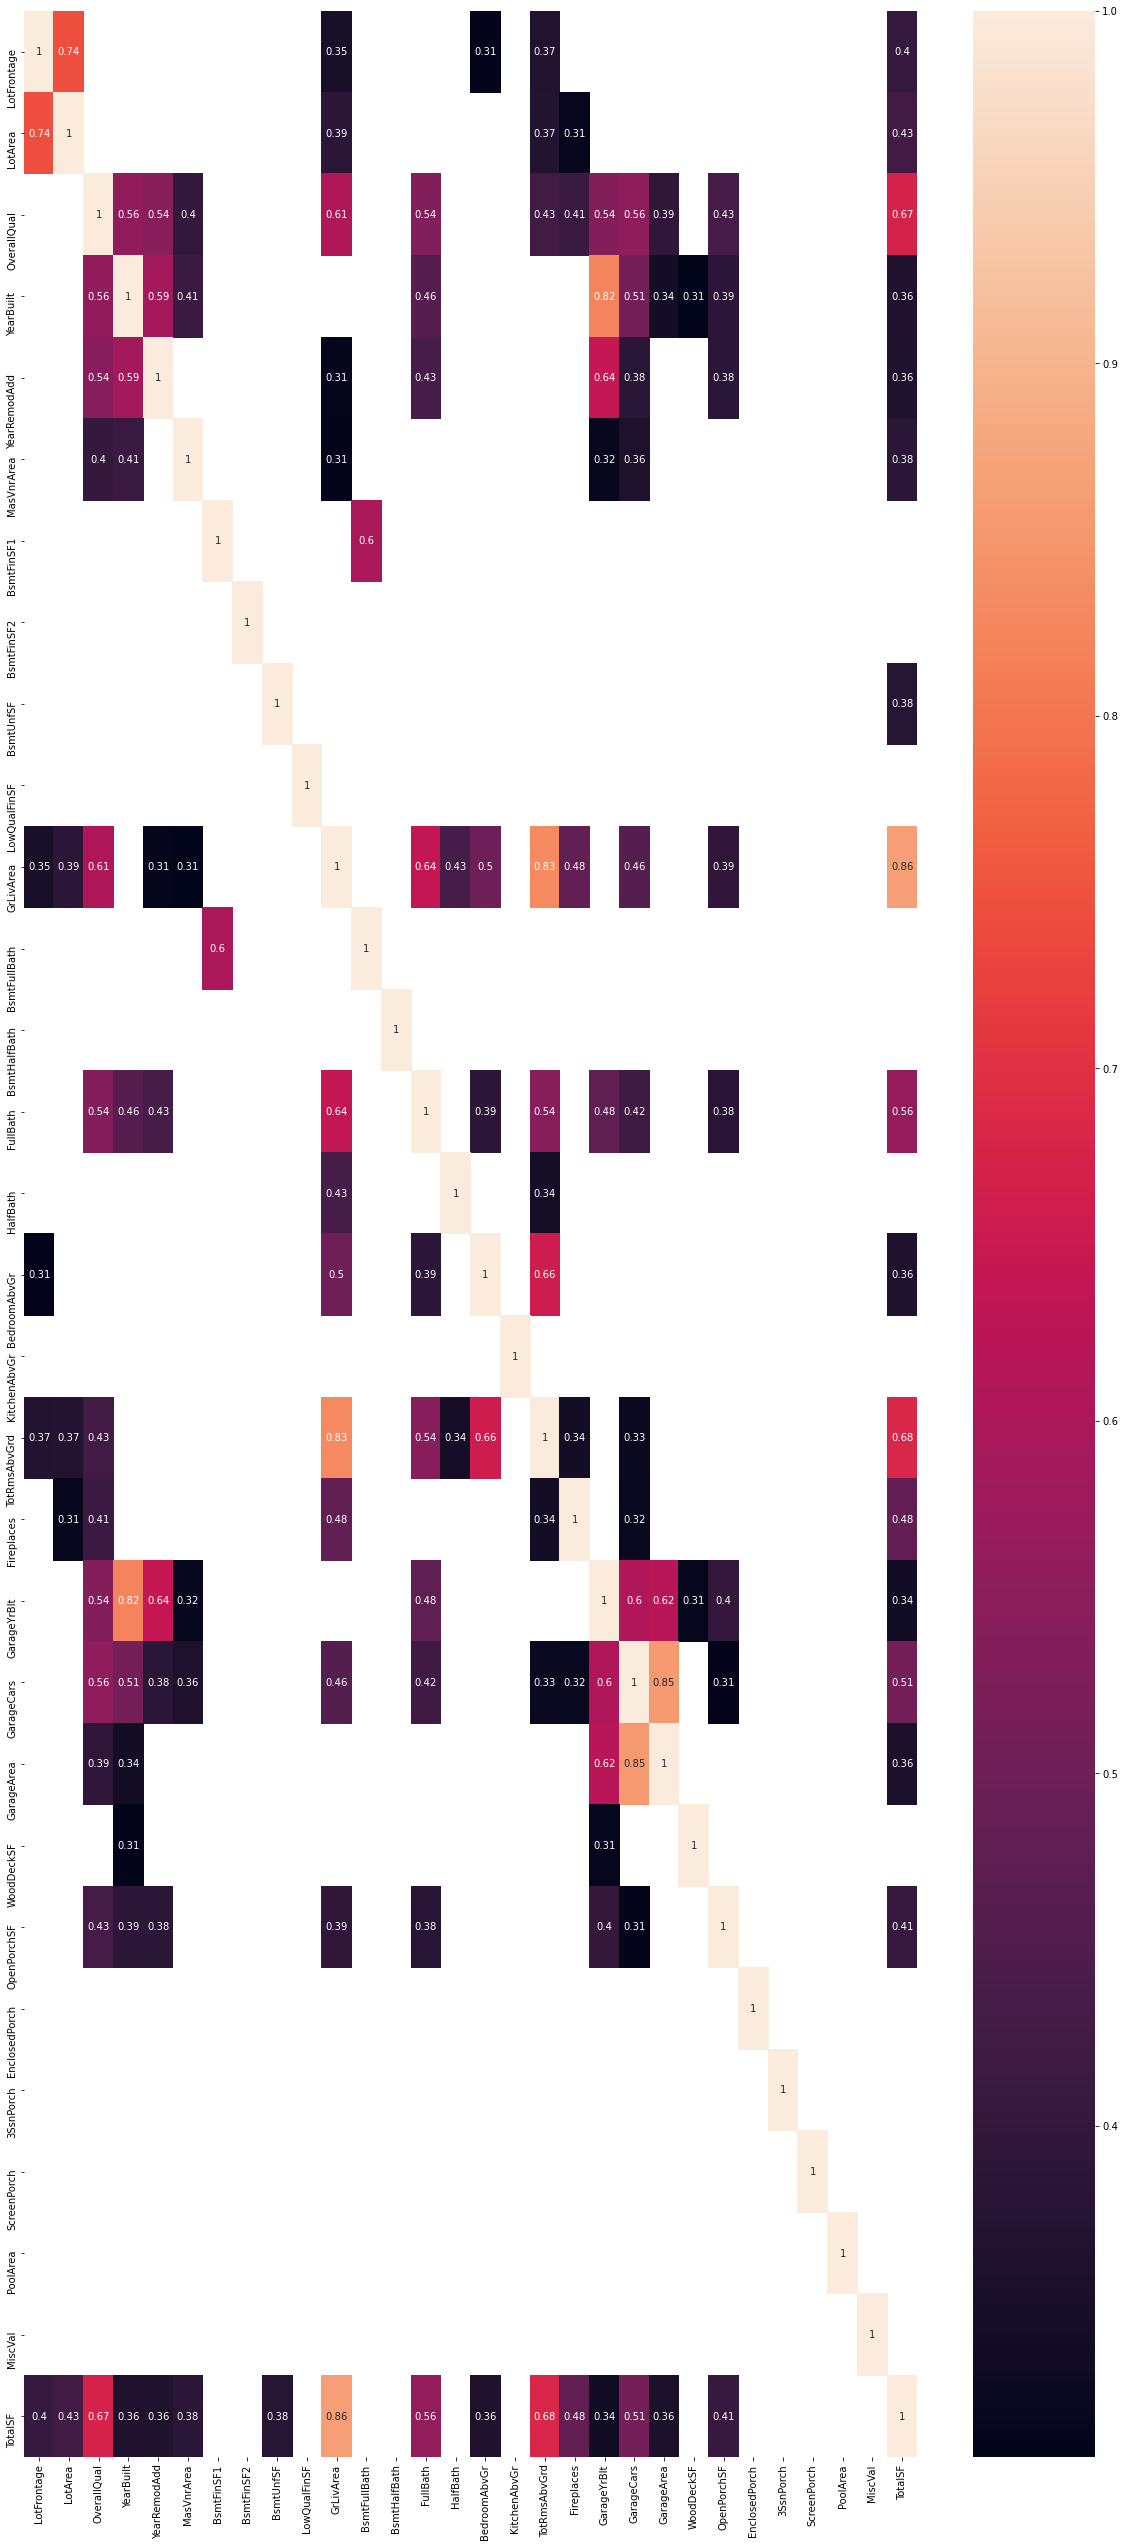

In [163]:
import matplotlib.pyplot as plt
corr=data_num.corr()
plt.figure(figsize=(20,45))
sns.heatmap(corr[corr>0.3],annot=True)

In [208]:
a=data_num.corr()
b=a>0.3

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
LotFrontage,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
LotArea,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
OverallQual,False,False,True,True,True,True,False,False,False,False,...,True,True,False,True,False,False,False,False,False,True
YearBuilt,False,False,True,True,True,True,False,False,False,False,...,True,True,True,True,False,False,False,False,False,True
YearRemodAdd,False,False,True,True,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
MasVnrArea,False,False,True,True,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
BsmtFinSF1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BsmtFinSF2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
BsmtUnfSF,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
LowQualFinSF,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [165]:
#WE will apply PCA for multicollinearity after splitting into train and test

# 8. Linear Regression Modeling

In [174]:
x_train,x_test,y_train,y_test=train_test_split(Independent_variables,target_log,test_size=0.30,random_state=0)

In [175]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 263)
(438, 263)
(1022,)
(438,)


In [187]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 
model1 = sm.OLS(y_train, x_train).fit()
# Note the Swap of X and Y 

In [188]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     66.48
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:02:28   Log-Likelihood:                 1081.3
No. Observations:                1022   AIC:                            -1655.
Df Residuals:                     768   BIC:                            -402.5
Df Model:                         253                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.0150      0.058      0.261      0.794      -0.098       0.128
LotArea                   0.5601      0.081      6.915      0.000       0.401       0.719
OverallQual               0.3572      0.063      5.668      0.000       0.234       0.481
YearBuilt                 0.2619      0.066      3.953      0.000       0.132       0.392
YearRemodAdd              0.0533      0.019      2.831      0.005       0.016       0.090
MasVnrArea                0.0764      0.047      1.614      0.107      -0.017       0.169
BsmtFinSF1                0.0931      0.052      1.790      0.074      -0.009       0.195
BsmtFinSF2                0.0068      0.077      0.088      0.930      -0.145       0.158
BsmtUnfSF                -0.0364      0.026     -1.408      0.160      -0.087       0.014
LowQualFinSF             -0.0166      0.038     -0.435      0.664      -0.091       0.058
GrLivArea                 0.6563      0.179      3.665      0.000       0.305       1.008
BsmtFullBath              0.0563      0.021      2.662      0.008       0.015       0.098
BsmtHalfBath              0.0321      0.027      1.200      0.230      -0.020       0.085
FullBath                  0.1122      0.043      2.621      0.009       0.028       0.196
HalfBath                  0.0494      0.019      2.534      0.011       0.011       0.088
BedroomAbvGr             -0.0813      0.062     -1.311      0.190      -0.203       0.040
KitchenAbvGr             -0.1946      0.117     -1.662      0.097      -0.424       0.035
TotRmsAbvGrd              0.0183      0.060      0.302      0.763      -0.100       0.137
Fireplaces                0.0351      0.016      2.134      0.033       0.003       0.067
GarageYrBlt              -0.0327      0.040     -0.826      0.409      -0.110       0.045
GarageCars                0.0825      0.056      1.474      0.141      -0.027       0.192
GarageArea                0.2048      0.123      1.659      0.098      -0.038       0.447
WoodDeckSF                0.0374      0.010      3.603      0.000       0.017       0.058
OpenPorchSF               0.0101      0.013      0.796      0.426      -0.015       0.035
EnclosedPorch             0.0110      0.015      0.715      0.475      -0.019       0.041
3SsnPorch                -0.0079      0.034     -0.231      0.817      -0.075       0.059
ScreenPorch               0.0356      0.016      2.276      0.023       0.005       0.066
PoolArea                  0.2126      0.076      2.787      0.005       0.063       0.362
MiscVal                   0.0261      0.027      0.952      0.342      -0.028       0.080
TotalSF                   0.9668      0.214      4.515      0.000       0.546       1.387
MSSubClass_160           -0.0436      0.058     -0.750      0.454      -0.158       0.071
MSSubClass_180         

In [210]:
predictions2=model1.predict(x_test)

tm2=pd.Series({'Model':'Linear regression model with constant',
              'R_square':model1.rsquared,
              'Adj_r_sq':model1.rsquared_adj,
              'RMSE':np.sqrt(mean_squared_error(predictions2,y_test))})

In [211]:
tm2

Model       Linear regression model with constant
R_square                                  0.95633
Adj_r_sq                                 0.941944
RMSE                                     0.477872
dtype: object

In [212]:
predictions2=model1.predict(x_train)

tm2=pd.Series({'Model':'Linear regression model with constant',
              'R_square':model1.rsquared,
              'Adj_r_sq':model1.rsquared_adj,
              'RMSE':np.sqrt(mean_squared_error(predictions2,y_train))})

In [213]:
tm2

Model       Linear regression model with constant
R_square                                  0.95633
Adj_r_sq                                 0.941944
RMSE                                    0.0839961
dtype: object